In [73]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from matplotlib import figure
import random

In [3]:
from HW1 import *

genes = readFile("Assignment1Sequences.txt")

# Initialize the lookup table
AATable = setUpTable()

# Holds the resulting genes in AA format
AASeqs = {}
for gene in genes:
    # Convert RNA string to AA format and store in the
    # AASeqs dictionary
    AASeqs[gene] = (convertToAAs(genes[gene], AATable, single_letter=False))

In [4]:
gene1 = AASeqs['Gene1']
gene2 = AASeqs['Gene2']
gene3 = AASeqs['Gene3']

In [5]:
# gene1_domains = [(257, 279), (328, 350), (370, 392), (455,477), (509, 531)]
# gene2_domains = []
# gene3_domains = [(647, 669)]


gene1_domains = [(257, 275), (327, 348), (372, 390), (427, 445), (455, 473), (510, 531)]

In [6]:
hw_hydrophobicity = {   
    'Ala': -0.5,
    'Arg': 3.0,
    'Asn': 0.2,
    'Asp': 3.0,
    'Cys': -1.0,
    'Gln': 0.2,
    'Glu': 3.0,
    'Gly': 0.0,
    'His': -0.5,
    'Ile': -0.8,
    'Leu': -1.8,
    'Lys': -1.3,
    'Met': 3.0,
    'Phe': -2.5,
    'Pro': 0.0,
    'Ser': 0.3,
    'Thr': -0.4,
    'Trp': -3.4,
    'Tyr': -2.3,
    'Val': -1.5,
    '*': 0
}

hydropathy = {   
    'Ala': 1.8,
    'Arg': -4.5,
    'Asn': -3.5,
    'Asp': -3.5,
    'Cys': 2.5,
    'Gln': -3.5,
    'Glu': -3.5,
    'Gly': -0.4,
    'His': -3.2,
    'Ile': 4.5,
    'Leu': 3.8,
    'Lys': -3.9,
    'Met': 1.9,
    'Phe': 2.8,
    'Pro': -1.6,
    'Ser': -0.8,
    'Thr': 0.7,
    'Trp': -0.9,
    'Tyr': -1.3,
    'Val': -4.2,
    '*': 0
}

polarity = {   
    'Ala': 'N',
    'Arg': '+',
    'Asn': 'P',
    'Asp': '-',
    'Cys': 'P',
    'Gln': 'P',
    'Glu': '-',
    'Gly': 'N',
    'His': '+',
    'Ile': 'N',
    'Leu': 'N',
    'Lys': '+',
    'Met': 'N',
    'Phe': 'N',
    'Pro': 'N',
    'Ser': 'P',
    'Thr': 'P',
    'Trp': 'N',
    'Tyr': 'P',
    'Val': 'N',
    '*': 0
}

triple_letter_to_single_letter = {   
    'Ala': 'A',
    'Arg': 'R',
    'Asn': 'N',
    'Asp': 'D',
    'Asx': 'B',
    'Cys': 'C',
    'Gln': 'Q',
    'Glu': 'E',
    'Glx': 'Z',
    'Gly': 'G',
    'His': 'H',
    'Ile': 'I',
    'Leu': 'L',
    'Lys': 'K',
    'Met': 'M',
    'Phe': 'F',
    'Pro': 'P',
    'Ser': 'S',
    'Thr': 'T',
    'Trp': 'W',
    'Tyr': 'Y',
    'Val': 'V'
}

name_to_tripe_letter = {
    'alanine': 'ala',
    'arginine': 'arg',
    'asparagine': 'asn',
    'asparagine or aspartic acid': 'asx',
    'aspartic acid': 'asp',
    'cysteine': 'cys',
    'glutamic acid': 'glu',
    'glutamine': 'gln',
    'glutamine or glutamic acid': 'glx',
    'glycine': 'gly',
    'histidine': 'his',
    'isoleucine': 'ile',
    'leucine': 'leu',
    'lysine': 'lys',
    'methionine': 'met',
    'phenylalanine': 'phe',
    'proline': 'pro',
    'serine': 'ser',
    'threonine': 'thr',
    'tryptophan': 'trp',
    'tyrosine': 'tyr',
    'valine': 'val'
}

# Interface scale, Octanol scale, Octanol interface
# https://en.wikipedia.org/wiki/Hydrophobicity_scales
hydrophobic_scales = {   
    'Ala': [0.17, 0.5, 0.33],
    'Arg': [0.81, 1.81, 1.0],
    'Asn': [0.42, 0.85, 0.43],
    'Asp-': [1.23, 3.64, 2.41],
    'Asp': [-0.07, 0.43, 0.5],
    'Cys': [-0.24, -0.02, 0.22],
    'Gln': [0.58, 0.77, 0.19],
    'Glu-': [2.02, 3.63, 1.61],
    'Glu': [-0.01, 0.11, 0.12],
    'Gly': [0.01, 1.15, 1.14],
    'His+': [0.96, 2.33, 1.37],
    'His': [0.17, 0.11, -0.06],
    'Ile': [-0.31, -1.12, -0.81],
    'Leu': [-0.56, -1.25, -0.69],
    'Lys': [0.99, 2.8, 1.81],
    'Met': [-0.23, -0.67, -0.44],
    'Phe': [-1.13, -1.71, -0.58],
    'Pro': [0.45, 0.14, -0.31],
    'Ser': [0.13, 0.46, 0.33],
    'Thr': [0.14, 0.25, 0.11],
    'Trp': [-1.85, -2.09, -0.24],
    'Tyr': [-0.94, -0.71, 0.23],
    'Val': [0.07, -0.46, -0.53],
    '*'  : [0, 0, 0]
}

In [7]:
for a, b in gene1_domains:
    r = []
    for i in range(a-1, b):
        r.append('{}'.format(polarity[gene1[i]]))
    print('Helix from {}-{}:'.format(a, b), ' '.join(r))

Helix from 257-275: N N - N N N P N N N N N N N P N N N P
Helix from 327-348: N N N N N N N N N N N P N P N N N P N N P N
Helix from 372-390: P P N N N P N N N N N P N N N N N N N
Helix from 427-445: N N P - N N P N N N N P N N P N N N P
Helix from 455-473: N N N N N N N N N N N N N P N P N N P
Helix from 510-531: N N N N N N N N N N N N N N N N N P - N P N


In [8]:
for a, b in gene3_domains:
    r = []
    for i in range(a-1, b):
        r.append('{}'.format(polarity[gene3[i]]))
    print('Helix from {}-{}:'.format(a, b), ' '.join(r))

NameError: name 'gene3_domains' is not defined

In [9]:
for a, b in gene1_domains:
    r = []
    v = []
    for i in range(a-1, b):
        r.append('{:.1f}'.format(hw_hydrophobicity[gene1[i]]))
        v.append(hw_hydrophobicity[gene1[i]])
    print('Helix from {}-{}:'.format(a, b), ', '.join(r))
    print('Mean: {}'.format(np.mean(v)))

Helix from 257-275: -1.8, -0.5, 3.0, -2.5, 3.0, 0.0, -0.4, 3.0, -1.5, 3.0, -0.8, -0.8, -2.5, 0.0, 0.3, -0.5, -1.5, -1.5, -1.0
Mean: -0.15789473684210523
Helix from 327-348: -0.5, -1.8, 0.0, -3.4, -0.5, -0.5, -0.5, -1.5, -1.5, 3.0, 0.0, -2.3, -2.5, -1.0, -0.5, 0.0, 0.0, 0.3, -0.5, -0.8, 0.3, 0.0
Mean: -0.6454545454545454
Helix from 372-390: -2.3, -2.3, -2.5, -0.5, 0.0, 0.2, -1.8, -0.8, 0.0, -0.5, -2.5, -0.4, 0.0, -0.5, -1.8, -0.8, -1.8, -2.5, -0.8
Mean: -1.1368421052631579
Helix from 427-445: -2.5, -2.5, 0.3, 3.0, -2.5, -1.8, -1.0, 0.0, -0.5, 3.0, -1.8, 0.2, -0.5, 0.0, -0.4, -2.5, -0.5, -1.8, -0.4
Mean: -0.6421052631578948
Helix from 455-473: -1.5, -2.5, 0.0, -1.8, 3.0, 3.0, -2.5, -0.8, -1.8, -0.8, -2.5, -0.8, -0.8, 0.2, -0.5, 0.3, 3.0, -0.5, -2.3
Mean: -0.5052631578947367
Helix from 510-531: -3.4, -1.5, 0.0, 3.0, -1.5, 0.0, 0.0, -2.5, -0.8, 0.0, -0.5, -1.8, 3.0, 0.0, 0.0, -1.8, -1.5, -2.3, 3.0, -1.5, -1.0, -0.8
Mean: -0.540909090909091


In [10]:
for a, b in gene3_domains:
    r = []
    v = []
    for i in range(a-1, b):
        r.append('{:.1f}'.format(hw_hydrophobicity[gene3[i]]))
        v.append(hw_hydrophobicity[gene3[i]])
    print('Helix from {}-{}:'.format(a, b), ', '.join(r))
    print('Mean: {}'.format(np.mean(v)))

NameError: name 'gene3_domains' is not defined

In [11]:
for a, b in gene1_domains:
    r = []
    for i in range(a-30, a):
        r.append('{}'.format(polarity[gene1[i]]))
    print('Helix from {}-{}:'.format(a-10, a), ' '.join(r))
    
    
print()

for a, b in gene1_domains:
    r = []
    for i in range(a-30, a):
        r.append('{}'.format(triple_letter_to_single_letter[gene1[i]]))
    print('Helix from {}-{}:'.format(a-10, a), ' '.join(r))

Helix from 247-257: P N P P N P N N N P P P + N N P + N P P N + P P P N + - N N
Helix from 317-327: P N P P N - P N - N N + P N P P N N P P N N N N P N - - N N
Helix from 362-372: N P N N P N N + N P N P N P N N P N N P + N N N N + + N N P
Helix from 417-427: - N P P - N N N P - P N N N N N P N N N + N P N P P N + P N
Helix from 445-455: P N N P - N N P N N N N P N N P N N N P - N P P P N P P - N
Helix from 500-510: N N + - N N N + N N N P N N N N - + + N N N N + + + + N N N

Helix from 247-257: N P Q T P T V L P S T Y H P I N K W S S V K N T Y L K E F L
Helix from 317-327: T G S S A E T I D A M K S L T S L V S S V A G G T F D D V A
Helix from 362-372: G S A I S G A H L N P S I T L A N L V Y R G F P L K K V P Y
Helix from 417-427: E A Y S D W W M N E S V A G M F C V F P K P Y L S S G R Q F
Helix from 445-455: Q F F S E F L C G A M L Q A G T F A L T D P Y T C L S S D V
Helix from 500-510: L A R D L G P R L A L Y A V G F D H K M L W V H H H H F F W


In [12]:
for a, b in gene1_domains:
    r = []
    for i in range(b+1, b+30):
        r.append('{}'.format(polarity[gene1[i]]))
    print('Seq from {}-{}:'.format(b, b+30), ' '.join(r))
    
print()

for a, b in gene1_domains:
    r = []
    for i in range(b+1, b+30):
        r.append('{}'.format(triple_letter_to_single_letter[gene1[i]]))
    print('Seq from {}-{}:'.format(a-10, a), ' '.join(r))

Seq from 275-305: N P N N N + N P P - P N P N N N - P N P N P N P P N - P N
Seq from 348-378: + N P N P N P N N P N N P + N N N N + + N N P P N N N P N
Seq from 390-420: P + + N N P - N P P - N N N P - P N N N N N P N N N + N P
Seq from 445-475: N P P P N P P - N N N N N N N N N N N N N P N P N N P P P
Seq from 473-503: P N P N N P N N + - N N N + N N N P N N N N - + + N N N N
Seq from 531-561: P N + - P N N P N P N N N P + - N N N + N N N + + N N N +

Seq from 247-257: V N V A G K I Q Q D N F N V A L D N L N V T G S S A E T I
Seq from 317-327: H L N P S I T L A N L V Y R G F P L K K V P Y Y F A G Q L
Seq from 362-372: Y H R V L Q E A Y S D W W M N E S V A G M F C V F P K P Y
Seq from 417-427: P Y T C L S S D V F P L M M F I L I F I I N A S M A Y Q T
Seq from 445-455: T G T A M N L A R D L G P R L A L Y A V G F D H K M L W V
Seq from 500-510: Q G H E S P V N W S L P V Y K E M I M R A W F R R P G W K


In [13]:
for a, b in gene1_domains:
    r = []
    for i in range(a-10, b+10):
        r.append('{}'.format(triple_letter_to_single_letter[gene1[i]] if gene1[i] in ['Lys', 'Arg'] else '.'))
    r = r[:10] + ['|'] + r[10:31] + ['|'] + r[31:]
    print('{}-{}:'.format(b, b+30), ' '.join(r))

275-305: . K . . . . K . . . | . . . . . . . . . . . . . . . . . . . . . | . . . K . . .
348-378: . . . . . . . . . . | . . . . . . . . . . . . . . . . . . . . . | . . . . . . . . . .
390-420: R . . . . K K . . . | . . . . . . . . . . . . . . . . . . . . . | R . . . . . .
445-475: K . . . . . . R . . | . . . . . . . . . . . . . . . . . . . . . | . . . . . . .
473-503: . . . . . . . . . . | . . . . . . . . . . . . . . . . . . . . . | . . . . . . R
531-561: . . . . . . . . . . | . . . . . . . . . . . . . . . . . . . . . | . . . . . . . . . .


In [14]:

hydrop_vals = [hydropathy[aa] for aa in gene1]

window_length = 20

some1 = [0 for i in range(len(hydrop_vals) - window_length + 1)]
val = 0

for i in range(window_length):
    if (hydrop_vals[i]):
        val += hydrop_vals[i]
        
some1[0] = val

for i in range(1, len(hydrop_vals) - window_length + 1):
    val -= hydrop_vals[i-1] if hydrop_vals[i-1] else 0
    val += hydrop_vals[i + 20 -1] if hydrop_vals[i + 20 -1] else 0
    some1[i] = val

some1 = np.array(some1)/20
print(some1, len(some1))

[-1.10000000e+00 -1.37000000e+00 -1.37000000e+00 -1.23500000e+00
 -1.38000000e+00 -1.40000000e+00 -1.38000000e+00 -1.51000000e+00
 -1.87500000e+00 -1.89500000e+00 -1.89500000e+00 -2.07500000e+00
 -2.30500000e+00 -2.44000000e+00 -2.57500000e+00 -2.42000000e+00
 -2.60500000e+00 -2.43500000e+00 -2.31500000e+00 -2.39000000e+00
 -2.40500000e+00 -2.31000000e+00 -2.31000000e+00 -2.43000000e+00
 -2.36500000e+00 -2.33000000e+00 -2.19500000e+00 -2.17500000e+00
 -2.02000000e+00 -1.79000000e+00 -1.79000000e+00 -1.92500000e+00
 -1.92500000e+00 -1.92500000e+00 -1.92500000e+00 -2.08000000e+00
 -2.03000000e+00 -2.16500000e+00 -2.30000000e+00 -2.43500000e+00
 -2.43500000e+00 -2.53000000e+00 -2.53000000e+00 -2.54500000e+00
 -2.56000000e+00 -2.57500000e+00 -2.71000000e+00 -2.86500000e+00
 -2.86500000e+00 -3.07500000e+00 -3.07500000e+00 -2.92000000e+00
 -2.90000000e+00 -2.90000000e+00 -2.90000000e+00 -2.90000000e+00
 -2.90000000e+00 -2.79000000e+00 -2.79000000e+00 -2.68000000e+00
 -2.68000000e+00 -2.41000

In [15]:
some1 = [hydrophobic_scales[aa][0] for aa in gene1]

In [16]:
%matplotlib
plt.plot(some1, c='lightblue')
plt.axhline(1.6, 0, 670)
for a, b in gene1_domains:
    plt.axvline(a-1, 0, 1, c='r')
    plt.axvline(b, 0, 1, c='g')

Using matplotlib backend: Qt5Agg


In [17]:

hydrop_vals = [hw_hydrophobicity[aa] for aa in gene3]

window_length = 20

some3 = [0 for i in range(len(hydrop_vals) - window_length + 1)]
val = 0

for i in range(window_length):
    if (hydrop_vals[i]):
        val += hydrop_vals[i]
        
some3[0] = val

for i in range(1, len(hydrop_vals) - window_length + 1):
    val -= hydrop_vals[i-1] if hydrop_vals[i-1] else 0
    val += hydrop_vals[i + 20 -1] if hydrop_vals[i + 20 -1] else 0
    some3[i] = val

some3 = np.array(some3)/20
print(some3, len(some3))

[ 8.55000000e-01  6.80000000e-01  6.85000000e-01  6.70000000e-01
  5.65000000e-01  5.65000000e-01  5.15000000e-01  5.65000000e-01
  5.75000000e-01  5.75000000e-01  6.30000000e-01  6.45000000e-01
  4.70000000e-01  2.30000000e-01  5.50000000e-02 -1.20000000e-01
 -2.95000000e-01 -4.65000000e-01 -4.65000000e-01 -4.65000000e-01
 -4.40000000e-01 -4.15000000e-01 -3.95000000e-01 -3.95000000e-01
 -3.05000000e-01 -3.55000000e-01 -1.30000000e-01 -1.30000000e-01
 -5.00000000e-02 -5.00000000e-02 -5.00000000e-02 -1.00000000e-01
 -6.00000000e-02  5.00000000e-03 -4.50000000e-02 -4.50000000e-02
  1.30000000e-01  1.30000000e-01  1.50000000e-01  3.25000000e-01
  3.40000000e-01  3.55000000e-01  2.80000000e-01  2.80000000e-01
  2.30000000e-01  3.20000000e-01  8.00000000e-02  1.05000000e-01
  1.00000000e-01  1.00000000e-01  6.00000000e-02  6.00000000e-02
  2.00000000e-02  1.95000000e-01  4.20000000e-01  4.25000000e-01
  2.75000000e-01  3.05000000e-01  3.20000000e-01  9.50000000e-02
 -1.00000000e-02 -2.50000

In [18]:
%matplotlib
plt.plot(some3)
plt.axhline(1.6, 0, 670)
for a, b in gene3_domains:
    plt.axvline(a-1, 0, 1, c='r')
    plt.axvline(b, 0, 1, c='g')

Using matplotlib backend: Qt5Agg


NameError: name 'gene3_domains' is not defined

In [19]:
import pprint
import pandas as pd

In [20]:
# Get the TMBase database
data = pd.read_csv('tmbase/tmb_h.txt')

In [21]:
data

,helix-ID,ID,TM#,Start,Stop,Pre,Transmem,Post,Comment
0,100K_LACLA/1,100K_LACLA,1,838,851,LELSE,AIFVPILKLFQICL,NaN,POTENTIAL.
1,1A01_GORGO/1,1A01_GORGO,1,309,332,PTIPI,VGIIAGLVLFGAVIAGAVVAAVRW,RRKSS,NaN
2,1A01_HUMAN/1,1A01_HUMAN,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRKSS,NaN
3,1A01_PANTR/1,1A01_PANTR,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRKSS,NaN
4,1A01_PONPY/1,1A01_PONPY,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRRNS,NaN
...,...,...,...,...,...,...,...,...,...
8169,ZNRP_YEAST/2,ZNRP_YEAST,2,42,58,ADSFH,MLNDIISLLVALWAVDV,AKNRG,POTENTIAL.
8170,ZNRP_YEAST/3,ZNRP_YEAST,3,80,96,AEILG,ALINAVFLIALCFSIMI,EALQR,POTENTIAL.
8171,ZNRP_YEAST/4,ZNRP_YEAST,4,113,129,IQNPR,LVLYVGVAGLISNVVGL,FLFHD,POTENTIAL.
8172,ZNRP_YEAST/5,ZNRP_YEAST,5,240,256,VFLHV,LGDALGNIGVIAAALFI,WKTEY,POTENTIAL.


In [22]:
data[~ data.Comment.str.contains('POTENTIAL', na=False)]

,helix-ID,ID,TM#,Start,Stop,Pre,Transmem,Post,Comment
1,1A01_GORGO/1,1A01_GORGO,1,309,332,PTIPI,VGIIAGLVLFGAVIAGAVVAAVRW,RRKSS,NaN
2,1A01_HUMAN/1,1A01_HUMAN,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRKSS,NaN
3,1A01_PANTR/1,1A01_PANTR,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRKSS,NaN
4,1A01_PONPY/1,1A01_PONPY,1,309,332,PTIPI,VGIIAGLVLLGAVITGAVVAAVMW,RRRNS,NaN
5,1A01_SAGOE/1,1A01_SAGOE,1,309,332,PTIPI,MGIVAILAILGVVVTGAVVAAVMW,RKKSS,NaN
...,...,...,...,...,...,...,...,...,...
8088,VS10_ROTH7/1,VS10_ROTH7,1,29,44,ILEDP,GMAYFPYIASVLTVLF,TLHRA,NaN
8089,VS10_ROTH8/1,VS10_ROTH8,1,29,44,ILEDP,GMAYFPYIASVLTVLF,TLHKA,NaN
8090,VS10_ROTHW/1,VS10_ROTHW,1,29,44,IIQDP,GMAYFLYIASVLTVLF,TLHKA,NaN
8091,VS10_ROTS1/1,VS10_ROTS1,1,29,44,ILEDP,GMAYFPYIASVLTGLF,ALNKA,NaN


In [23]:
transmembranes = data.Transmem.unique()
transmembranes

array(['AIFVPILKLFQICL', 'VGIIAGLVLFGAVIAGAVVAAVRW',
       'VGIIAGLVLLGAVITGAVVAAVMW', ..., 'LVLYVGVAGLISNVVGL',
       'LGDALGNIGVIAAALFI', 'IVSLIITIIIFSSALPL'], dtype=object)

In [24]:
# This analyzes the transmembrane domains
hist = {}
for tm in transmembranes:
    for aa in tm:
        if not aa in hist:
            hist[aa] = 0
        hist[aa] += 1
print(hist, len(hist))

{'A': 13624, 'I': 15979, 'F': 11709, 'V': 16044, 'P': 3515, 'L': 23387, 'K': 732, 'Q': 1492, 'C': 3120, 'G': 9659, 'R': 980, 'W': 3156, 'T': 6906, 'M': 4853, 'D': 932, 'S': 7554, 'H': 1332, 'Y': 4840, 'E': 996, 'N': 2422, 'X': 3} 21


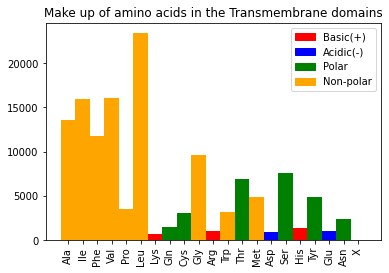

In [25]:
single_letter_to_three_letter = {}
for aa in triple_letter_to_single_letter:
    single_letter_to_three_letter[triple_letter_to_single_letter[aa]] = aa

def draw_hist_plot(hist, title=""):
    %matplotlib inline

    color_dict = {
        'N': 'orange',
        'P': 'g',
        '+': 'r',
        '-': 'b'
    }
    red_patch = mpatches.Patch(color='r', label='Basic(+)')
    blue_patch = mpatches.Patch(color='b', label='Acidic(-)')
    green_patch = mpatches.Patch(color='g', label='Polar')
    orange_patch = mpatches.Patch(color='orange', label='Non-polar')

    keys = [single_letter_to_three_letter.get(k, k) for k in hist.keys()]

    plt.xticks(rotation=90)
    plt.title(title)
    plt.bar(keys, hist.values(), width=1, color=[color_dict.get(polarity.get(k, k), 'black') for k in keys])
    plt.legend(handles=[red_patch, blue_patch, green_patch, orange_patch])
    
draw_hist_plot(hist, "Make up of amino acids in the Transmembrane domains")

['LELSE' 'PTIPI' 'STIPI' ... 'IQNPR' 'VFLHV' 'YYSDP']
{'L': 1928, 'E': 1170, 'S': 1857, 'P': 1240, 'T': 1528, 'I': 1138, 'V': 1177, 'H': 652, 'K': 1684, 'R': 1800, 'A': 1502, 'C': 387, 'Q': 946, 'W': 574, 'F': 996, 'Y': 806, 'G': 1544, 'M': 534, 'N': 1229, 'D': 1040, 'X': 8} 21


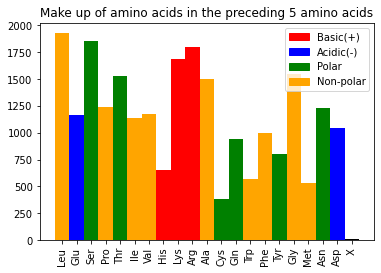

In [26]:
# This analyzes the previous 5 amino acids
pre = data.Pre.unique()
print(pre)

hist = {}
for pr in pre:
    if type(pr) != str:
        continue
    for aa in pr:
        if not aa in hist:
            hist[aa] = 0
        hist[aa] += 1
print(hist, len(hist))

draw_hist_plot(hist, "Make up of amino acids in the preceding 5 amino acids")

[nan 'RRKSS' 'RRRNS' ... 'FLFHD' 'WKTEY' 'SRRAS']
{'R': 2169, 'K': 1838, 'S': 1676, 'N': 1128, 'G': 1470, 'C': 433, 'H': 668, 'E': 1181, 'I': 1126, 'P': 1036, 'Y': 928, 'T': 1342, 'Q': 970, 'V': 1158, 'F': 1065, 'A': 1386, 'M': 510, 'L': 1758, 'D': 956, 'W': 463, 'X': 4, '*': 15} 22


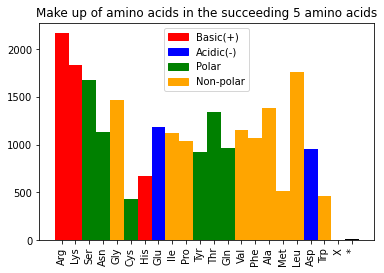

In [27]:
# This analyzes the post 5 amino acids
post = data.Post.unique()
print(post)

hist = {}
for pr in post:
    if type(pr) != str:
        continue
    for aa in pr:
        if not aa in hist:
            hist[aa] = 0
        hist[aa] += 1
print(hist, len(hist))

draw_hist_plot(hist, "Make up of amino acids in the succeeding 5 amino acids")

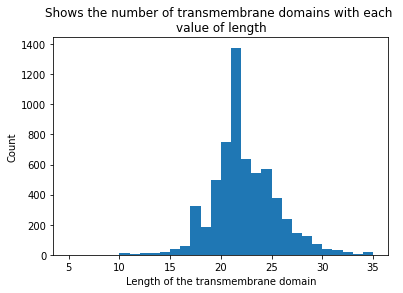

In [28]:
plt.hist([len(t) for t in transmembranes], np.arange(5, 36))
plt.title('Shows the number of transmembrane domains with each \nvalue of length')
plt.ylabel('Count')
plt.xlabel('Length of the transmembrane domain')
plt.show()

Text(0.5, 1.0, 'Hydropathy')

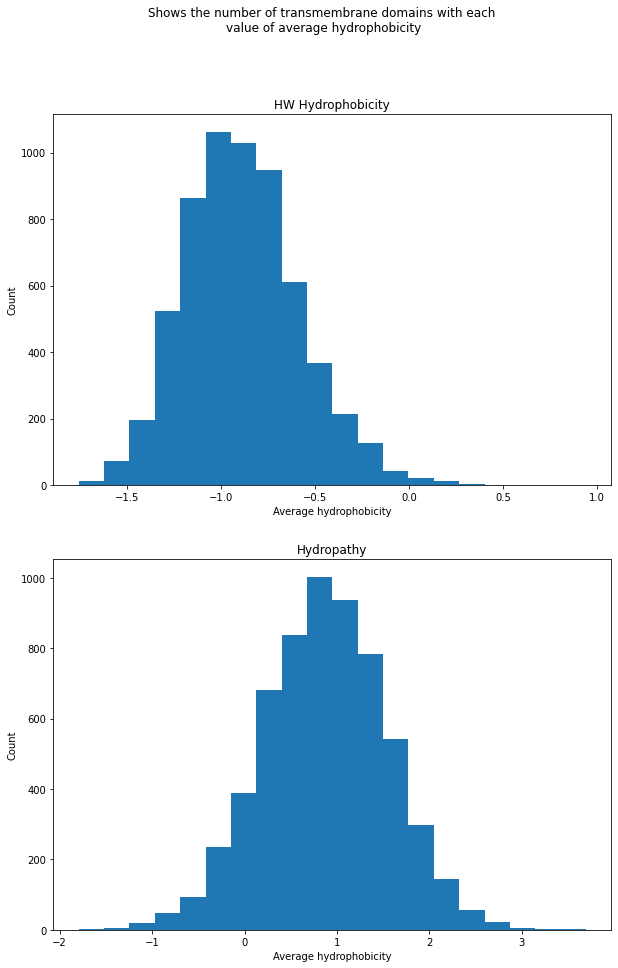

In [50]:
def calculate_avg_hydrobicity(tm, hydro = hw_hydrophobicity):
    s = 0
    for aa in tm:
        s += hydro.get(single_letter_to_three_letter.get(aa, aa), 0)
    return s / len(tm)

fig, (ax1, ax2) = plt.subplots(2, sharex = False)
fig.set_size_inches(10, 15)
fig.suptitle('Shows the number of transmembrane domains with each \nvalue of average hydrophobicity')

ax1.hist([calculate_avg_hydrobicity(t) for t in transmembranes], 20)
ax2.hist([calculate_avg_hydrobicity(t, hydropathy) for t in transmembranes], 20)

ax1.set_ylabel('Count')
ax1.set_xlabel('Average hydrophobicity')
ax1.set_title('HW Hydrophobicity')

ax2.set_ylabel('Count')
ax2.set_xlabel('Average hydrophobicity')
ax2.set_title('Hydropathy')

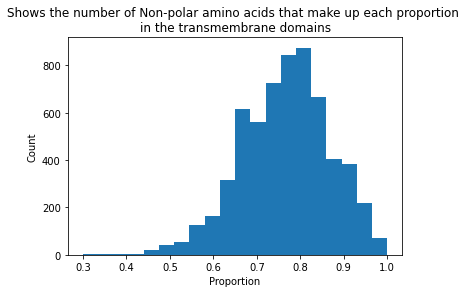

In [85]:
def calculate_percentage_of_non_polar(tm):
    s = 0
    for aa in tm:
        if polarity.get(single_letter_to_three_letter.get(aa, aa), aa) == 'N':
            s += 1
    return s / len(tm)

plt.hist([calculate_percentage_of_non_polar(t) for t in transmembranes], 20)
plt.title('Shows the number of Non-polar amino acids that make up each proportion \nin the transmembrane domains')
plt.ylabel('Count')
plt.xlabel('Proportion')
plt.show()

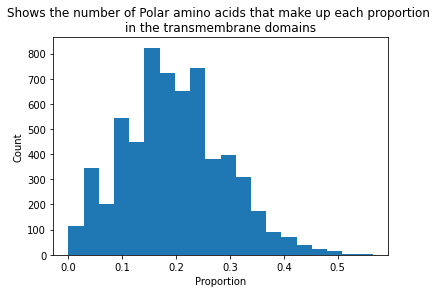

In [86]:
def calculate_percentage_of_polar(tm):
    s = 0
    for aa in tm:
        if polarity.get(single_letter_to_three_letter.get(aa, aa), aa) == 'P':
            s += 1
    return s / len(tm)

plt.hist([calculate_percentage_of_polar(t) for t in transmembranes], 20)
plt.title('Shows the number of Polar amino acids that make up each proportion \nin the transmembrane domains')
plt.ylabel('Count')
plt.xlabel('Proportion')
plt.show()

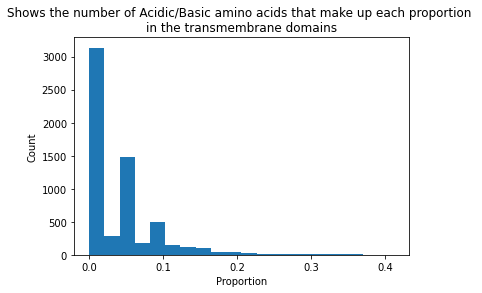

In [83]:
def calculate_percentage_of_charged(tm):
    s = 0
    for aa in tm:
        if polarity.get(single_letter_to_three_letter.get(aa, aa), aa) in ['+', '-']:
            s += 1
    return s / len(tm)

plt.hist([calculate_percentage_of_charged(t) for t in transmembranes], 20)
plt.title('Shows the number of Acidic/Basic amino acids that make up each proportion \nin the transmembrane domains')
plt.ylabel('Count')
plt.xlabel('Proportion')
plt.show()

In [123]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [ ]:
# Finds the longest common subsequence between two strings
%%cython
def lcs(s1, s2):
    matrix = [["" for x in range(len(s2))] for x in range(len(s1))]
    for i in range(len(s1)):
        for j in range(len(s2)):
            if s1[i] == s2[j]:
                if i == 0 or j == 0:
                    matrix[i][j] = s1[i]
                else:
                    matrix[i][j] = matrix[i-1][j-1] + s1[i]
            else:
                matrix[i][j] = max(matrix[i-1][j], matrix[i][j-1], key=len)

    cs = matrix[-1][-1]

    return len(cs), cs

In [128]:
def somefunc():
    random.seed(42)
    subset = random.choices(transmembranes, k = 1000)

    hist = {}

    for i, t1 in enumerate(subset):
        for t in subset[i+1:]:
            l = lcs(t1, t)[1]
            hist[l] = hist.get(l, 0) + 1

    cleaner_hist = {}
    for key in hist:
        if hist[key] > 2:
            cleaner_hist[key] = hist[key]
    print(cleaner_hist, len(cleaner_hist))
    
    return hist, cleaner_hist

%timeit somefunc()

{'LSVVFFITL': 3, 'LVVFF': 4, 'VSVVVGL': 3, 'LVVVTL': 3, 'LVVGL': 13, 'LVVVGL': 5, 'LFSVIV': 3, 'LFGL': 3, 'LVVGVVL': 4, 'LFGF': 5, 'VVVIF': 5, 'LGFIV': 3, 'LGVIFT': 4, 'LVIL': 5, 'LFFIVL': 8, 'LGIL': 3, 'VVGL': 4, 'LVTM': 11, 'LVVGI': 3, 'VSNM': 3, 'LFFL': 10, 'LTSCMGVL': 3, 'LTTV': 4, 'LFFIL': 5, 'LFGFF': 3, 'LMSFFFVL': 4, 'LVVVMG': 3, 'LVFFVIV': 3, 'LMSI': 3, 'LSL': 12, 'MVFFL': 3, 'LMFSL': 4, 'GVFILGCVIY': 4, 'ILFSVLI': 3, 'FFGFVL': 3, 'VFILGI': 6, 'GFVFLSVLI': 7, 'VFVILF': 4, 'GVVILGYFY': 4, 'IFYCLYP': 4, 'VVFLFL': 4, 'VVFLCV': 3, 'GVFIFVLI': 3, 'GILGVLI': 6, 'GVILGV': 3, 'WLYNSVNLIS': 4, 'EGVVLSVL': 4, 'VVILVL': 6, 'GVVLV': 4, 'GVVIGVLI': 3, 'VILSLIS': 3, 'GVIGFY': 5, 'VFFGFSVL': 3, 'VILG': 6, 'GIGF': 3, 'GVVLVL': 3, 'FILSVL': 4, 'VFVFGLS': 4, 'VIFGSVLYS': 3, 'FFWLGFV': 4, 'VII': 5, 'IWLYNVPLI': 4, 'LVPLI': 6, 'FVLFSVI': 4, 'VILGLI': 3, 'GILFL': 5, 'VIFLVLY': 5, 'FFLFNVLY': 3, 'GFVFSS': 3, 'VVILYFSL': 4, 'IWLSVLI': 4, 'ILSLI': 3, 'VLGFN': 7, 'EWFL': 7, 'VVWLL': 3, 'WLFPL': 3, 'VFI

{'LSVVFFITL': 3, 'LVVFF': 4, 'VSVVVGL': 3, 'LVVVTL': 3, 'LVVGL': 13, 'LVVVGL': 5, 'LFSVIV': 3, 'LFGL': 3, 'LVVGVVL': 4, 'LFGF': 5, 'VVVIF': 5, 'LGFIV': 3, 'LGVIFT': 4, 'LVIL': 5, 'LFFIVL': 8, 'LGIL': 3, 'VVGL': 4, 'LVTM': 11, 'LVVGI': 3, 'VSNM': 3, 'LFFL': 10, 'LTSCMGVL': 3, 'LTTV': 4, 'LFFIL': 5, 'LFGFF': 3, 'LMSFFFVL': 4, 'LVVVMG': 3, 'LVFFVIV': 3, 'LMSI': 3, 'LSL': 12, 'MVFFL': 3, 'LMFSL': 4, 'GVFILGCVIY': 4, 'ILFSVLI': 3, 'FFGFVL': 3, 'VFILGI': 6, 'GFVFLSVLI': 7, 'VFVILF': 4, 'GVVILGYFY': 4, 'IFYCLYP': 4, 'VVFLFL': 4, 'VVFLCV': 3, 'GVFIFVLI': 3, 'GILGVLI': 6, 'GVILGV': 3, 'WLYNSVNLIS': 4, 'EGVVLSVL': 4, 'VVILVL': 6, 'GVVLV': 4, 'GVVIGVLI': 3, 'VILSLIS': 3, 'GVIGFY': 5, 'VFFGFSVL': 3, 'VILG': 6, 'GIGF': 3, 'GVVLVL': 3, 'FILSVL': 4, 'VFVFGLS': 4, 'VIFGSVLYS': 3, 'FFWLGFV': 4, 'VII': 5, 'IWLYNVPLI': 4, 'LVPLI': 6, 'FVLFSVI': 4, 'VILGLI': 3, 'GILFL': 5, 'VIFLVLY': 5, 'FFLFNVLY': 3, 'GFVFSS': 3, 'VVILYFSL': 4, 'IWLSVLI': 4, 'ILSLI': 3, 'VLGFN': 7, 'EWFL': 7, 'VVWLL': 3, 'WLFPL': 3, 'VFI

{'LSVVFFITL': 3, 'LVVFF': 4, 'VSVVVGL': 3, 'LVVVTL': 3, 'LVVGL': 13, 'LVVVGL': 5, 'LFSVIV': 3, 'LFGL': 3, 'LVVGVVL': 4, 'LFGF': 5, 'VVVIF': 5, 'LGFIV': 3, 'LGVIFT': 4, 'LVIL': 5, 'LFFIVL': 8, 'LGIL': 3, 'VVGL': 4, 'LVTM': 11, 'LVVGI': 3, 'VSNM': 3, 'LFFL': 10, 'LTSCMGVL': 3, 'LTTV': 4, 'LFFIL': 5, 'LFGFF': 3, 'LMSFFFVL': 4, 'LVVVMG': 3, 'LVFFVIV': 3, 'LMSI': 3, 'LSL': 12, 'MVFFL': 3, 'LMFSL': 4, 'GVFILGCVIY': 4, 'ILFSVLI': 3, 'FFGFVL': 3, 'VFILGI': 6, 'GFVFLSVLI': 7, 'VFVILF': 4, 'GVVILGYFY': 4, 'IFYCLYP': 4, 'VVFLFL': 4, 'VVFLCV': 3, 'GVFIFVLI': 3, 'GILGVLI': 6, 'GVILGV': 3, 'WLYNSVNLIS': 4, 'EGVVLSVL': 4, 'VVILVL': 6, 'GVVLV': 4, 'GVVIGVLI': 3, 'VILSLIS': 3, 'GVIGFY': 5, 'VFFGFSVL': 3, 'VILG': 6, 'GIGF': 3, 'GVVLVL': 3, 'FILSVL': 4, 'VFVFGLS': 4, 'VIFGSVLYS': 3, 'FFWLGFV': 4, 'VII': 5, 'IWLYNVPLI': 4, 'LVPLI': 6, 'FVLFSVI': 4, 'VILGLI': 3, 'GILFL': 5, 'VIFLVLY': 5, 'FFLFNVLY': 3, 'GFVFSS': 3, 'VVILYFSL': 4, 'IWLSVLI': 4, 'ILSLI': 3, 'VLGFN': 7, 'EWFL': 7, 'VVWLL': 3, 'WLFPL': 3, 'VFI

KeyboardInterrupt: 

In [90]:
np.sort(np.array(list(cleaner_hist.values())))[::-1]/(500*999)

array([2.04204204e-04, 1.80180180e-04, 1.40140140e-04, ...,
       6.00600601e-06, 6.00600601e-06, 6.00600601e-06])

In [111]:

random.seed(42)
subset = random.choices(data.Pre.dropna().unique(), k = 1000)

hist1 = {}
%time
for i, t1 in enumerate(subset):
    for t in subset[i+1:]:
        l = lcs(t1, t)[1]
        hist1[l] = hist1.get(l, 0) + 1
    
cleaner_hist1 = {}
for key in hist1:
    if hist1[key] > 2:
        cleaner_hist1[key] = hist1[key]
print(cleaner_hist1, len(cleaner_hist1))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
{'H': 4223, 'A': 19062, 'N': 12109, '': 127925, 'NS': 351, 'G': 18770, 'GA': 448, 'HS': 133, 'S': 30214, 'NG': 101, 'SA': 805, 'HN': 80, 'NA': 73, 'GS': 492, 'HG': 116, 'HA': 16, 'Y': 4944, 'T': 17234, 'VH': 66, 'VT': 1082, 'HY': 56, 'V': 14555, 'TH': 49, 'VY': 63, 'TY': 102, 'YY': 43, 'D': 10678, 'ND': 136, 'FD': 414, 'F': 9909, 'DH': 21, 'NF': 57, 'HD': 36, 'FH': 199, 'NH': 44, 'HH': 33, 'FHH': 6, 'FHD': 16, 'FDH': 3, 'FHDH': 3, 'LR': 1343, 'L': 31587, 'R': 21708, 'RD': 205, 'YD': 96, 'RA': 368, 'LD': 467, 'AD': 331, 'LRD': 5, 'YL': 108, 'YA': 73, 'YR': 49, 'LA': 373, 'YAD': 3, 'RAD': 3, 'YLR': 3, 'LAD': 5, 'LRA': 6, 'TM': 252, 'TD': 192, 'MN': 54, 'MD': 127, 'TN': 606, 'FT': 116, 'TMD': 5, 'M': 2797, 'FN': 333, 'FND': 5, 'FTD': 7, 'FTN': 3, 'FM': 8, 'Q': 9511, 'I': 9664, 'IK': 505, 'K': 23064, 'QK': 127, 'DI': 113, 'DK': 262, 'DIK': 18, 'QI': 74, 'DY': 105, 'DIY': 4, 'QD': 90, 'YK': 227, 'QY': 49, 'IYK': 4, 'QDY': 3, 'I

In [112]:
cleaner_hist1 = {}
for key in hist1:
    if hist1[key] > 2 and len(key) > 1:
        cleaner_hist1[key] = hist1[key]

#### np.sort(np.array(list(cleaner_hist1.values())))[::-1]

In [ ]:
# TODO: we need to make a predict function
def predict(sequence):
    pass

In [148]:
def ranges(nums):
    nums = sorted(set(nums))
    gaps = [[s, e] for s, e in zip(nums, nums[1:]) if s < e - 1]
    edges = iter(nums[:1] + sum(gaps, []) + nums[-1:])
    return list(zip(edges, edges))


ranges([1, 2, 3, 4, 6, 8])

[(1, 4), (6, 6), (8, 8)]

In [159]:
from HW1test import *

def kmain():
    genes = readFile("Assignment1Sequences.txt")
    table = setUpTable()
    AASeqs = []
    for gene in genes:
        AASeqs.append(convertToAAs(genes[gene], table, single_letter=False))
    for seq in AASeqs:
        conform_vals = [conforms[aa] for aa in seq]



        window_length = 20
        some = [0 for i in conform_vals]

        val = 0



        for i in range(window_length):

            if (conform_vals[i] >= 0.8):

                val += 1



        some[0] = val



        for i in range(1, len(conform_vals) - window_length + 1):

            val -= 1 if conform_vals[i-1] >= 0.8 else 0

            val += 1 if conform_vals[i + 20 -1] >= 0.8 else 0

            some[i] = val

        high_vals = []
        for i in range(len(some)):
            if some[i] >= 18:
                high_vals.append(i)
        aves = []
        for group in ranges(high_vals):
            aves.append(round(sum(group) / len(group)))
        good_vals = []
        for ave in aves:
            if len(good_vals) == 0 or ave > good_vals[-1] + 20:
                good_vals.append(ave)
        print(aves)
        print(good_vals)


In [160]:
kmain()

[256, 260, 303, 320, 371, 447, 458, 507, 512]
[256, 303, 371, 447, 507]
[]
[]
[649, 656]
[649]
